In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# PDの日本語フォントをサポート
# plt.rcParams['font.family'] = 'Gothic'

# Macの日本語フォントをサポート
plt.rcParams['font.family'] = 'Hiragino Sans'

# CSVファイルからデータセットを読み込む
csv_file_path = 'emdat.csv'  # CSVファイルのパスに置き換えてください
emdat = pd.read_csv(csv_file_path)

# データセットの最初の数行を表示
emdat.head()

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


## Examples

### **チャレンジ 1: 国ごとの死亡者数を可視化**
- **内容**: 指定した国の災害データを使用し、災害タイプごとの死亡者数を棒グラフで可視化する関数を作成してください。

### **チャレンジ 2: 2つの国の死亡者数を比較**
- **内容**: 指定した2つの国の死亡者数を災害タイプごとに比較する関数を作成してください。

### **チャレンジ 3: 最も致命的な災害トップNを可視化**
- **内容**: 死亡者数が多い順に、最も致命的な災害を上位N件（例: トップ5）可視化する関数を作成してください。

### **チャレンジ 4: 特定の年範囲での死亡者数を可視化**
- **内容**: 特定の年範囲（例: 2000年から2010年）の死亡者数を可視化する関数を作成してください。

### **チャレンジ 5: カスタム可視化を作成**
- **内容**: 学生自身でユニークな関数を作成し、以下のような条件でデータを可視化してください。
  - 複数のパラメータ（例えば、国と災害タイプ）を組み合わせた可視化。
  - 特定の条件を満たすデータ（例: 死亡者数が1,000以上）を強調表示する。

#### **チャレンジ１**

### 関数: 指定国の災害タイプごとの死亡者数を可視化

使い方の例: visualize_deaths_by_disaster_type(emdat, 'Japan', top_n=10)

In [ ]:
def visualize_deaths_by_disaster_type(df, country, top_n=None, use_plotly=False):
    sub = df[df['Country'] == country].copy()
    if sub.empty:
        print(f"データが見つかりません: {country}")
        return
    sub['Total Deaths'] = pd.to_numeric(sub['Total Deaths'], errors='coerce').fillna(0)
    grouped = sub.groupby('Disaster Type')['Total Deaths'].sum().sort_values(ascending=False)
    if top_n is not None:
        grouped = grouped.head(top_n)
    labels = grouped.index.tolist()
    values = grouped.values
    if use_plotly:
        fig = px.bar(x=labels, y=values, labels={'x':'Disaster Type','y':'Total Deaths'},
                     title=f"{country} - Deaths by Disaster Type")
        fig.update_layout(xaxis_tickangle=-45)
        fig.show()
    else:
        plt.figure(figsize=(10,6))
        plt.bar(labels, values)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Total Deaths')
        plt.title(f"{country} - Deaths by Disaster Type")
        plt.tight_layout()
        plt.show()

findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font famil

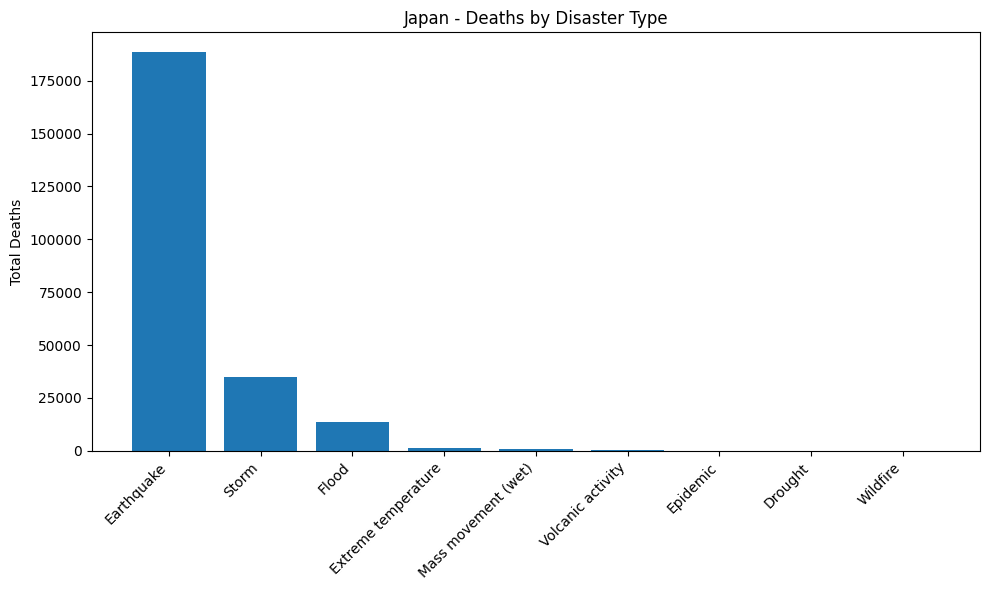

In [9]:
visualize_deaths_by_disaster_type(emdat, 'Japan', top_n=100, use_plotly=False)